<a href="https://colab.research.google.com/github/rahuls321/Time-Series-Forecasting-With-Python/blob/master/Identify_and_Remove_Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


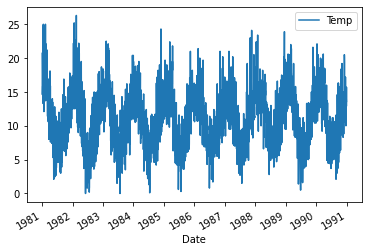

In [77]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('gdrive/My Drive/Colab Notebooks/Forecasting_Datasets/daily-min-temperatures.csv', header=0, parse_dates =["Date"], index_col ="Date")
print(series.head())
series.plot()
pyplot.show()

##Seasonal Adjustment with Differencing

One way to remove seasonality by taking differences between two seasonality period.


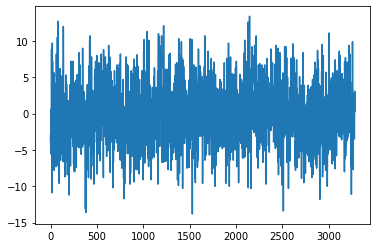

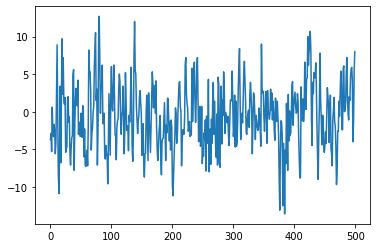

In [43]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()
pyplot.plot(diff[:500])

In [47]:
series.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

Leap years are not explicitily handled.

Instead of considering day by day, we should consider the time series on month basis by taking the average monthly temp.

                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323
1981-06-30   7.306667
1981-07-31   7.577419
1981-08-31   7.238710
1981-09-30  10.143333
1981-10-31  10.087097
1981-11-30  11.890000
1981-12-31  13.680645
1982-01-31  16.567742
1982-02-28  15.921429
1982-03-31  14.935484


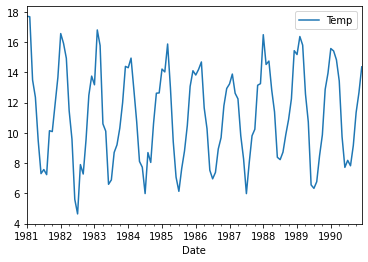

In [54]:
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(15))
monthly_mean.plot()
pyplot.show()

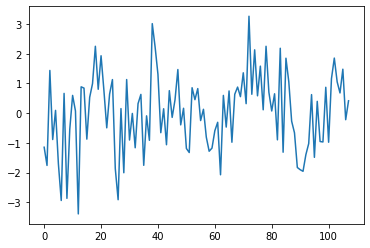

In [62]:
resample = series.resample('M')
monthly_mean = resample.mean()
X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
	value = monthly_mean.iloc[i]['Temp'] - monthly_mean.iloc[i - months_in_year]['Temp']
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

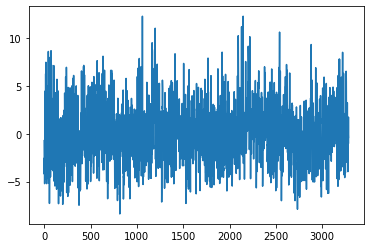

In [67]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
	month_mean_last_year = series[month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

 This creates the seasonally adjusted dataset and plots the results.

##Seasonal Adjustment with Modeling

If we see carefully the seasonality graph is nothing but more likely a sine wave curve.

The NumPy library provides the polyfit() function that can be used to fit a polynomial of a chosen order to a dataset.

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


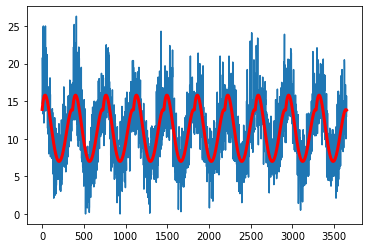

In [84]:
from numpy import polyfit
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1][0]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d][0]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

The curve appears to be a good fit for the seasonal structure in the dataset.

We can now use this model to create a seasonally adjusted version of the dataset.

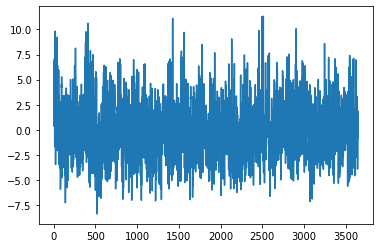

In [85]:
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()